# Análise Exploratória de Dados (EDA) – NEOs (Near-Earth Objects)

Este notebook tem como objetivo explorar os dados extraídos da API da NASA sobre objetos próximos da Terra (NEOs), com foco em variáveis relevantes para classificação de risco.

As colunas analisadas incluem tamanho, velocidade, distância de aproximação e o rótulo `is_hazardous`, que indica se o objeto é potencialmente perigoso.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Config de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Carregar CSV
df = pd.read_csv("../data/processed/neo_data.csv")
df.head()

,name,date,diameter_min_m,diameter_max_m,miss_distance_km,velocity_kph,is_hazardous
0,523605 (2004 RX10),2025-07-11,133.830462,299.254010,6.869943e+07,84615.673814,False
1,(2005 VO5),2025-07-11,296.862251,663.804174,6.085390e+06,51758.466819,True
2,(2013 NT11),2025-07-11,336.166921,751.692087,5.059198e+07,93733.220388,False
3,(2017 FZ2),2025-07-11,12.721988,28.447230,4.126669e+07,34511.076858,False
4,(2017 UQ7),2025-07-11,23.689450,52.971220,6.054609e+07,55778.394645,False


## Estrutura do DataFrame

Verificamos os tipos de cada coluna e se há valores ausentes.

In [2]:
df.info()
print("\nValores nulos por coluna: \n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              419 non-null    object 
 1   date              419 non-null    object 
 2   diameter_min_m    419 non-null    float64
 3   diameter_max_m    419 non-null    float64
 4   miss_distance_km  419 non-null    float64
 5   velocity_kph      419 non-null    float64
 6   is_hazardous      419 non-null    bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 20.2+ KB

Valores nulos por coluna: 
 name                0
date                0
diameter_min_m      0
diameter_max_m      0
miss_distance_km    0
velocity_kph        0
is_hazardous        0
dtype: int64


## Estatísticas descritivas

A seguir, calculamos medidas como média, desvio padrão e valores máximos/mínimos para as variáveis numéricas.

In [3]:
df.describe()

,diameter_min_m,diameter_max_m,miss_distance_km,velocity_kph
count,419.000000,419.000000,4.190000e+02,419.000000
mean,72.605138,162.350025,3.110734e+07,43487.308395
std,163.039187,364.566705,2.359454e+07,23446.291116
min,1.332156,2.978791,1.045735e+04,4604.552569
25%,15.581039,34.840263,9.647722e+06,25709.890438
50%,32.103692,71.786037,2.624772e+07,38030.995282
75%,73.040769,163.324125,5.277976e+07,57715.840676
max,2597.496533,5808.178820,7.473016e+07,145033.018759


## Distribuição do diâmetro máximo dos objetos

Visualizamos como os tamanhos máximos dos NEOs estão distribuídos no dataset.

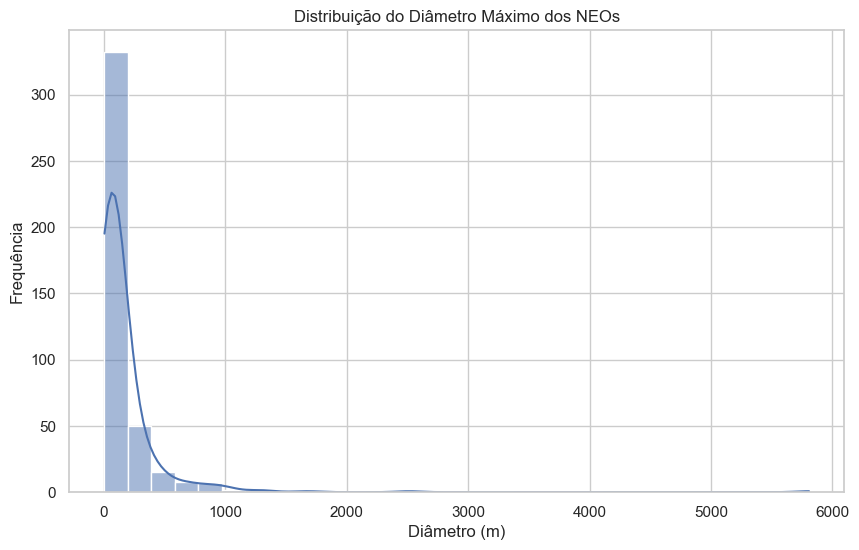

In [4]:
sns.histplot(df["diameter_max_m"], bins=30, kde=True)
plt.title("Distribuição do Diâmetro Máximo dos NEOs")
plt.xlabel("Diâmetro (m)")
plt.ylabel("Frequência")
plt.show()

## Distribuição da velocidade

Análise da distribuição da velocidade relativa dos objetos em km/h.

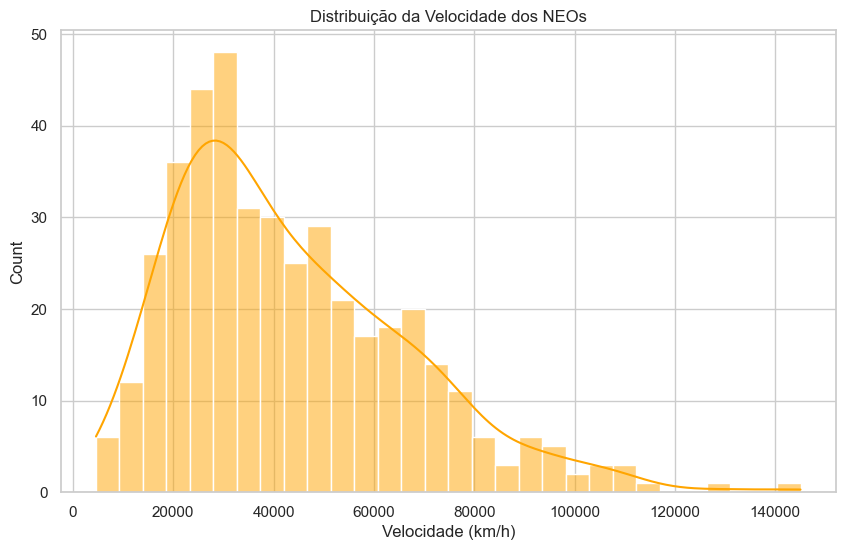

In [5]:
sns.histplot(df["velocity_kph"], bins=30, color="orange", kde=True)
plt.title("Distribuição da Velocidade dos NEOs")
plt.xlabel("Velocidade (km/h)")
plt.show()

## Distribuição de objetos perigosos

Aqui visualizamos a quantidade de NEOs classificados como potencialmente perigosos (`is_hazardous = True`) em comparação aos não perigosos.

Também mostramos a proporção percentual de cada classe, o que será útil para avaliar se o dataset está desbalanceado — fator importante na escolha do modelo de machine learning.

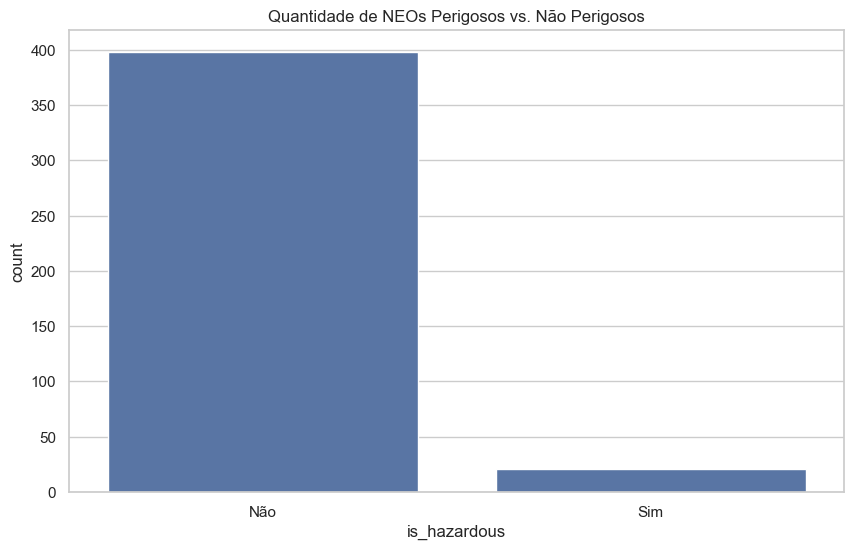

is_hazardous
False    94.988067
True      5.011933
Name: proportion, dtype: float64


In [6]:
sns.countplot(x="is_hazardous", data=df)
plt.title("Quantidade de NEOs Perigosos vs. Não Perigosos")
plt.xticks([0,1], ["Não", "Sim"])
plt.show()

print(df["is_hazardous"].value_counts(normalize=True) * 100)

## Correlação entre variáveis numéricas

Visualizamos a matriz de correlação entre as variáveis contínuas. Isso ajuda a identificar possíveis dependências lineares relevantes para a modelagem.

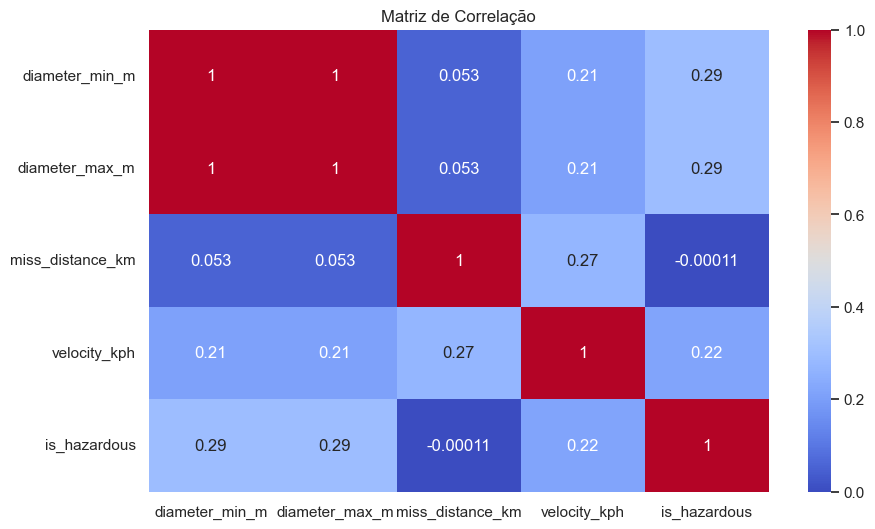

In [7]:
corr = df.drop(columns=["name", "date"]).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## Distância de aproximação vs. risco potencial

Neste gráfico comparamos a distância de aproximação (`miss_distance_km`) entre objetos perigosos e não perigosos. 

Apesar da expectativa de que objetos perigosos passem mais próximos, a correlação linear entre `miss_distance_km` e `is_hazardous` é baixa. Isso pode ser explicado pela influência de outras variáveis como o diâmetro mínimo.

Text(0.5, 1.0, 'Distribuição da distância por tipo de NEO')

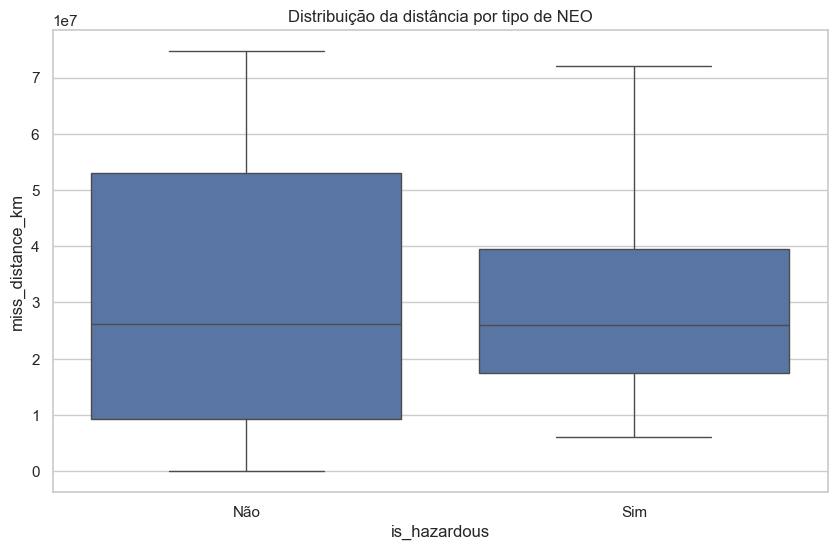

In [8]:
sns.boxplot(x="is_hazardous", y="miss_distance_km", data=df)
plt.xticks([0, 1], ["Não", "Sim"])
plt.title("Distribuição da distância por tipo de NEO")